**Importing Libraries for Data Preprocessing and Classification**

In [103]:
import pandas as pd
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy.sparse import hstack, csr_matrix

**Importing the Train and Test Datasets**

In [104]:
df_train=pd.read_csv('/content/Constraint_Train.csv')
df_test=pd.read_csv('/content/Constraint_Test.csv')


In [105]:
df_train

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


In [106]:
df_test

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real
...,...,...,...
2135,2136,Donald Trump wrongly claimed that New Zealand ...,fake
2136,2137,Current understanding is #COVID19 spreads most...,real
2137,2138,Nothing screams “I am sat around doing fuck al...,fake
2138,2139,Birx says COVID-19 outbreak not under control ...,fake


In [107]:
df_train.dtypes

id        int64
tweet    object
label    object
dtype: object

In [108]:
df_test.dtypes

id        int64
tweet    object
label    object
dtype: object

In [109]:
df_train.isna().sum()

id       0
tweet    0
label    0
dtype: int64

**Dropping the unwanted column**

In [110]:
df_train.drop(['id'],axis=1,inplace=True)
df_train

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
...,...,...
6415,A tiger tested positive for COVID-19 please st...,fake
6416,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,_A post claims a COVID-19 vaccine has already ...,fake
6418,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


**Creating a Bar graph of the Target**

real    3360
fake    3060
Name: label, dtype: int64

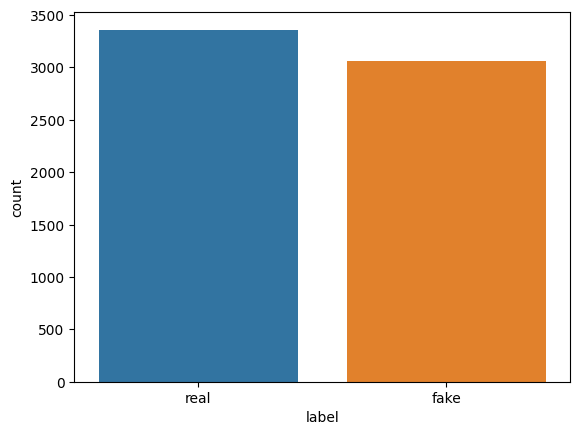

In [111]:
sns.countplot(x='label',data=df_train)
df_train['label'].value_counts()

**Extracting text data from 'tweet' column**

In [112]:
text_train=df_train.tweet

**Removing special characters from text data**

In [113]:
text_train=text_train.str.replace('[^a-zA-Z0-9]+'," ")
text_train

<ipython-input-113-567546d12365>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text_train=text_train.str.replace('[^a-zA-Z0-9]+'," ")


0       The CDC currently reports 99031 deaths In gene...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman Almost Uses Pandemic...
3        IndiaFightsCorona We have 1524 COVID testing ...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID 19 please st...
6416     Autopsies prove that COVID 19 is a blood clot...
6417     A post claims a COVID 19 vaccine has already ...
6418     Aamir Khan Donate 250 Cr In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

**Initializing Snowball stemmer**

In [114]:
stemmer=SnowballStemmer('english')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Applying stemming to text data**

In [115]:
text_train=text_train.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda y:' '.join(y))
text_train

0       the cdc current report 99031 death in general ...
1       state report 1121 death a small rise from last...
2       polit correct woman almost use pandem as excus...
3       indiafightscorona we have 1524 covid test labo...
4       popul state can generat larg case count but if...
                              ...                        
6415    a tiger test posit for covid 19 pleas stay awa...
6416    autopsi prove that covid 19 is a blood clot no...
6417    a post claim a covid 19 vaccin has alreadi bee...
6418       aamir khan donat 250 cr in pm relief care fund
6419    it has been 93 day sinc the last case of covid...
Name: tweet, Length: 6420, dtype: object

**Initializing stopword list**

In [116]:
nltk.download('stopwords')
sw=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Removing stopwords from text data**

In [117]:
text_train=text_train.apply(lambda x:[i for i in word_tokenize(x) if i not in sw]).apply(lambda y:' '.join(y))
text_train

0       cdc current report 99031 death general discrep...
1       state report 1121 death small rise last tuesda...
2       polit correct woman almost use pandem excus re...
3       indiafightscorona 1524 covid test laboratori i...
4       popul state generat larg case count look new c...
                              ...                        
6415    tiger test posit covid 19 pleas stay away pet ...
6416    autopsi prove covid 19 blood clot pneumonia ou...
6417    post claim covid 19 vaccin alreadi develop cau...
6418          aamir khan donat 250 cr pm relief care fund
6419    93 day sinc last case covid 19 acquir local un...
Name: tweet, Length: 6420, dtype: object

**Removing unwanted text from dataset**

In [118]:
def remove(text):
    text=re.sub(r'http\S+',' ',text)
    text=re.sub(r'\b\d{1,2}\b','',text)
    return text
df_train["tweet"]=df_train['tweet'].apply(remove)

In [119]:
real_new=df_train.loc[df_train['label']=='real','tweet'].tolist()
fake_new=df_train.loc[df_train['label']=='fake','tweet'].tolist()

**Creating WordCloud for Real and Fake News dataset**

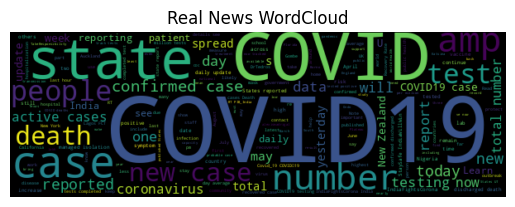

In [120]:
wordcloud=WordCloud(max_words=1500,width=600,background_color='black').generate(" ".join(real_new))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Real News WordCloud")
plt.axis("off")
plt.show()

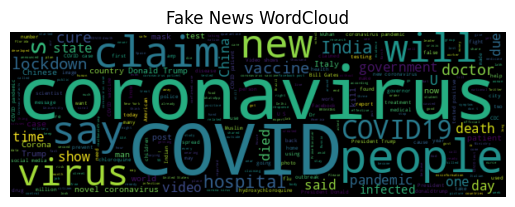

In [121]:
wordcloud=WordCloud(max_words=1500,width=600,background_color='black').generate(" ".join(fake_new))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Fake News WordCloud")
plt.axis("off")
plt.show()

**Converting text data to TF-IDF vectors**

In [122]:
vec=TfidfVectorizer()
X_train=vec.fit_transform(text_train)


**Preparing test data for prediction**

In [123]:
df_test.drop(['id'],axis=1,inplace=True)
text_test=df_test.tweet
text_test=text_test.str.replace('[^a-zA-Z0-9]+'," ")
text_test=text_test.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda y:' '.join(y))
text_test=text_test.apply(lambda x:[i for i in word_tokenize(x) if i not in sw]).apply(lambda y:' '.join(y))
X_test=vec.transform(text_test)


<ipython-input-123-6e16beace325>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  text_test=text_test.str.replace('[^a-zA-Z0-9]+'," ")


**Converting cateogerical labels to numerical labels**

In [124]:
df_train['label']=df_train['label'].map({'real':1,'fake':0})
df_test['label']=df_test['label'].map({'real':1,'fake':0})

**Extracting target labels from DataFrame**

In [125]:
y_train=df_train['label'].values
y_train

array([1, 1, 0, ..., 0, 0, 1])

In [126]:
y_test=df_test['label'].values
y_test

array([0, 0, 0, ..., 0, 0, 1])

**Printing the shapes of training and testing data**

In [127]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)


X_train shape: (6420, 14885)
X_test shape: (2140, 14885)


**Evaluating multiple classifiers on a dataset using cross-validation**

In [128]:
classifier=[KNeighborsClassifier(n_neighbors=5),SVC(kernel='rbf'),RandomForestClassifier(n_estimators=42),DecisionTreeClassifier(criterion='entropy'),AdaBoostClassifier(n_estimators=42),MultinomialNB()]
for i in classifier:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print('Accuracy: ',round(accuracy_score(y_test, y_pred)*100,2),'%')
  print("Classification report:",classification_report(y_test,y_pred))

KNeighborsClassifier()
Accuracy:  90.98 %
Classification report:               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1020
           1       0.92      0.91      0.91      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140

SVC()
Accuracy:  93.64 %
Classification report:               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1020
           1       0.93      0.95      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

RandomForestClassifier(n_estimators=42)
Accuracy:  92.2 %
Classification report:               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1020
           1       0.92      0.93      0.93

**Here the accuracy predicted by Support Vector Machine(SVM) is the highest**

**Some Example of news prediction using some classifers**

In [134]:
news="Here are some even broader views of the course of the pandemic from March 1 - July 31. First tests. https://t.co/BhM61DPEHZ"
for i in classifier:
  pred=i.predict(vec.transform([news]))
  print(i)
  if pred==1:
    print("Real News:  ",news)
  else:
    print("Fake News:  ",news)
  print("__"*100)


KNeighborsClassifier()
Real News:   Here are some even broader views of the course of the pandemic from March 1 - July 31. First tests. https://t.co/BhM61DPEHZ
________________________________________________________________________________________________________________________________________________________________________________________________________
SVC()
Real News:   Here are some even broader views of the course of the pandemic from March 1 - July 31. First tests. https://t.co/BhM61DPEHZ
________________________________________________________________________________________________________________________________________________________________________________________________________
RandomForestClassifier(n_estimators=42)
Real News:   Here are some even broader views of the course of the pandemic from March 1 - July 31. First tests. https://t.co/BhM61DPEHZ
______________________________________________________________________________________________________________________

In [135]:
news="CA Gov Urges Residents to Panic Buy and Hoard https://t.co/ZwgJ41U5Go #coronavirus #pandemic #governor #panicbuying #hoarding"
for i in classifier:
  pred=i.predict(vec.transform([news]))
  print(i)
  if pred==1:
    print("Real News:  ",news)
  else:
    print("Fake News:  ",news)
  print("__"*100)


KNeighborsClassifier()
Fake News:   CA Gov Urges Residents to Panic Buy and Hoard https://t.co/ZwgJ41U5Go #coronavirus #pandemic #governor #panicbuying #hoarding
________________________________________________________________________________________________________________________________________________________________________________________________________
SVC()
Fake News:   CA Gov Urges Residents to Panic Buy and Hoard https://t.co/ZwgJ41U5Go #coronavirus #pandemic #governor #panicbuying #hoarding
________________________________________________________________________________________________________________________________________________________________________________________________________
RandomForestClassifier(n_estimators=42)
Fake News:   CA Gov Urges Residents to Panic Buy and Hoard https://t.co/ZwgJ41U5Go #coronavirus #pandemic #governor #panicbuying #hoarding
________________________________________________________________________________________________________________